# **Fake versus Real News: Shedding Light on Information Authenticity**

In our **information-saturated digital age**, distinguishing between **fake and real news** has become an **imperative challenge**. **Fake news**, characterized by its **deliberate deception**, **sensationalism**, and **often malicious intent**, poses a **significant threat** to **public discourse**, **trust in media**, and **even democratic processes**. The spread of **false information** can **incite fear**, sway **public opinion**, and lead to **real-world consequences**. Therefore, the **ability to effectively detect** and **combat fake news** is of **utmost importance** in preserving the **integrity of information in society**.

The dataset at **our disposal** is a **comprehensive collection** of **news articles**, comprising **both real and fake examples**. Our mission is to **leverage this dataset** to develop a **robust classification model** that can **automatically distinguish between the two categories**. To achieve this, we will embark on a **data-driven journey**, encompassing **exploratory data analysis (EDA)** to **gain insights** into the **data's characteristics**, **text preprocessing** to prepare the **textual content** for modeling, and ultimately, the **development and fine-tuning of a classification model based on BERT**.

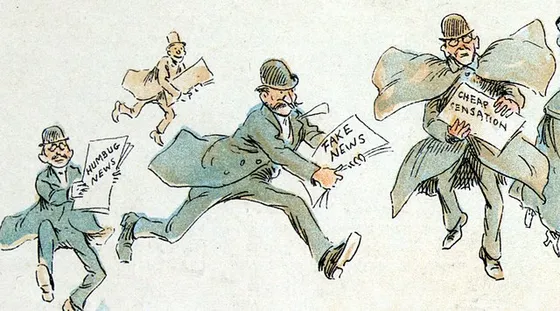

Our approach encompasses the following key steps:

* **Exploratory Data Analysis (EDA):** Gain insights into dataset characteristics and identify potential features for classification.

* **Text Preprocessing:** Prepare textual data for modeling through tokenization and removal of stopwords.

* **Model Development:** Utilize BERT-based classification models and fine-tune them on our dataset.

* **Model Evaluation:** Assess model performance using key metrics such as accuracy, precision, recall, and F1-score.

* **Interpretability:** Explore techniques to understand the model's decision-making process and identify important features.

* **Deployment:** Implement the trained model for automatic classification of news articles into fake or real categories.

# **Set Up**
---

In this section, we'll guide you through the initial steps to prepare your **environment** for working with the **dataset** and building the **fake news detection model**. We will make the **required imports** and will also set some **constants & hyperparameters** which will be later used.

In [1]:
%pip install transformers datasets --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports for Dataset
import time
import numpy as np
import pandas as pd
import nltk
import string
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

# Data Visualization
import plotly.express as px

# Classification Model
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# Model Training
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Data set management
CLASS_NAMES = ["Fake", "Real"]
MAPPING_DICT = {
    "Fake":0,
    "Real":1
}

# Model Callbacks
model_name = "BERTFakeNewsDetector"
MODEL_CALLBACKS = [ModelCheckpoint(model_name, save_best_only=True)]

# **Data Loading & Pre-Processing**
---

Now that we have **completed our setup**, it's time to **load our dataset**. In this section, we'll take a **closer look** at **the data**, perform **essential preprocessing steps**, and gain a **better understanding** of its **structure**. Let's delve into the **data loading and preprocessing** to set the stage for our **fake news detection journey.**

In [4]:
fake_news_filepath = "/kaggle/input/fake-and-real-news-dataset/Fake.csv"
real_news_filepath = "/kaggle/input/fake-and-real-news-dataset/True.csv"

In [5]:
fake_df = pd.read_csv(fake_news_filepath)
real_df = pd.read_csv(real_news_filepath)

In [6]:
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [7]:
real_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

Taking a **brief glance** at the **dataset**, we observe **four primary features**: **title, text, subject, and date**. While **subject and title** may **not** be **our primary focus**, our attention is drawn to the **text and date fields**. These **two components** hold the key to **our analysis** and are **central to our efforts** in discerning **fake from real news**.

---
Currently, we have **two seperate data frames** for the **real data and the fake data**. Let's combine them in a **single data frame**, which will make it easier to process the information.

In [8]:
# Classification Labels
real_df["Label"] = "Real"
fake_df["Label"] = "Fake"

In [9]:
df = pd.concat([fake_df, real_df])
df.reset_index()
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date Label  
0  December 31, 2017  Fake  
1  December 31, 2017  Fake  
2  December 30, 2017  Fake  
3  December 29, 2017  Fake  
4  December 25, 2017  Fake

In [10]:
print(f"Dataset Size: {len(df)}")

Dataset Size: 44898


Given the substantial size of this dataset, and considering the **limitations of memory resources**, we have opted to downsize the **dataset significantly**, capping it at **1,000 samples**.

In [11]:
data = df.sample(1000).drop(columns=["title", "subject", "date"])
data.Label = data.Label.map(MAPPING_DICT)
data.sample(10)

text  Label
5488   Donald Trump has not yet officially received t...      0
19114  Fun fact: While Trump press secretary Sean Spi...      0
4102   WASHINGTON (Reuters) - President Donald Trump’...      1
15382  BRUSSELS (Reuters) - Belgium s prime minister,...      1
1415   This morning President Trump called for a meet...      0
214    This article is uncensored and contains very o...      0
16894  PARIS (Reuters) - President Emmanuel Macron sa...      1
2648   White House press secretary of Alternative Fac...      0
5687   Ted Cruz, who chairs the Senate Judiciary Subc...      0
9865   (Reuters) - A federal judge on Tuesday approve...      1

The data presented above can be **valuable for visualization purposes**. However, when it comes to **model building and training**, we need a **streamlined version of the data**. Specifically, we can exclude the **title, subject, and date columns** as features for our model, focusing solely on the **essential text content**. Additionally, we'll need to convert the **categorical labels** into **numeric format** to facilitate **model training and evaluation.**

# **Data Visualization**

---

Before delving into the **classification task**, it's crucial to address **class imbalance**. This **initial analysis** is paramount because it can **significantly influence our model's performance**. Let's begin by assessing the **distribution of classes**, as this forms a **fundamental step** in our **model-building process**.

In [12]:
class_dis = px.histogram(
    data_frame = df,
    y = "Label",
    color = "Label",
    title = "Fake & Real Samples Distribution",
    text_auto=True
    )
class_dis.update_layout(showlegend=False)
class_dis.show()

It's evident that there's a **slight class imbalance** in our dataset, with a **higher number of fake samples compared to real samples**. However, the imbalance is **relatively low**, with **approximately 23,000 samples** for **fake news** and **21,000 samples for real news**. (On original Data)

While this level of **class imbalance** is **not expected** to **significantly impact our model's performance**, we'll take a **precautionary approach** and use a **stratified split** to ensure a **balanced distribution** of classes in our **training and testing sets**. This will help us maintain **model stability and mitigate** any potential **bias introduced** by the **class distribution**.

In [13]:
subject_dis = px.histogram(
    data_frame = df,
    x = "subject",
    color = "subject",
    facet_col = "Label",
    title = "Fake & Real Subject Distribution",
    text_auto=True
    )
subject_dis.update_layout(showlegend=False)
subject_dis.show()

Indeed, the **distribution of subjects or categories** in our dataset poses a **significant challenge** for using the **'subject' column** as a **feature** for **our model**. It's clear that the **all of fake news articles fall** under various subjects such as **politics, government news, left news, US news, and the Middle East**, while **real news articles** are primarily categorized under **political news and world news**. Utilizing the **'subject' column** as a feature could lead the model to **over-rely on this information**, potentially resulting in a **biased prediction** pattern where it **simply associates real news** with these **two subjects** and **makes guesses** based on that association.

Ideally, a **more balanced distribution** of **subjects between fake and real news** would have provided a **better learning environment** for the model. However, given the **dataset's inherent structure**, it's prudent to **exclude the 'subject' column** from our **feature set** and **focus on the textual content itself**. By doing so, we allow the model to **learn from the rich linguistic features** present in the text, enabling it to make **more nuanced and accurate predictions**.

In [14]:
list(filter(lambda x: len(x)>20, df.date.unique()))

['https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/',
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/',
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg',
 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]']

It does **seem unusual** to encounter **text and links** in a **date column**, especially in a **dataset** where one would expect the **'date' column to strictly contain date-related information**. Discovering such discrepancies highlights the **importance of data quality and integrity**. Anomalies like this can potentially **impact the accuracy and reliability of any analysis** or modeling conducted on the dataset.

In [15]:
df = df[df.date.map(lambda x: len(x)) <= 20]
df.date = pd.to_datetime(df.date, format="mixed")
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date Label  
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31  Fake  
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31  Fake  
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30  Fake  
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29  Fake  
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25  Fake

In [16]:
label_date_hist = px.histogram(
    data_frame = df,
    x = 'date',
    color = "Label",
)
label_date_hist.show()

The **observed patterns** in **data collection over time** indeed **raise intriguing questions** about the **dynamics of fake and real news** in the dataset. As you've pointed out, there are **two potential explanations for this phenomenon**.

The first explanation suggests that **real news might be more prevalent** in **recent times**. This could be due to **various factors**, including **improved government measures** to combat **fake news or a shift in public perception** and **consumption of news**. In this scenario, the **data collection reflects a real-world trend** where genuine **news articles** are on the rise.

The **second explanation** is related to **data collection strategies**. Since the dataset doesn't **start collecting both fake and real news** from the **same date**, it's possible that there are **external factors influencing** the **data collection process**. For instance, the increase in the **total number of real news articles** in **2018 might** be due to a **deliberate effort to balance the class distribution** and **reduce class imbalance** issues in the dataset. This approach can help create a **more representative dataset for machine learning purposes.**

The histogram indeed provides valuable insights into the **temporal distribution of fake and real news articles**, showcasing a decrease in **fake news** and a **significant increase in real news** as we approach **2018**.

In [17]:
real_sub_hist = px.histogram(
    data_frame = df[df.Label == "Real"],
    x = 'date',
    color = "subject",
)
real_sub_hist.show()

The observation that the spike in the **total number** of **real news articles** in recent years is **predominantly attributed to world news articles** collected starting in **August 2017** is an **interesting finding**.

It suggests that a **significant amount** of **world news** data, particularly from **August 2017 onwards**, was **incorporated into the dataset**. This clearly shows that the data is not collected in an **balanced manner**.

In [18]:
subject_hist = px.histogram(
    data_frame = df,
    x = 'date',
    color = "subject",
)
subject_hist.show()

In our dataset, the **distinct spikes and variations** in **news distribution** become clearer upon **closer examination**. These fluctuations can be traced back to the **timing of data collection** for **different news categories**. Notably, **'World News'** articles were **predominantly collected in the year 2017**, while other categories were **documented as far back as 2015**. Additionally, the **'Political News' category** joined the dataset in **2016**. Understanding these **temporal dynamics** is crucial for our analysis, as it sheds light on the **composition and origins of the data**, offering a structured foundation for **further exploration and modeling**.

# **Text Processing**
---

Before proceeding to the next steps, it's essential to apply preprocessing to our data. This includes converting the text to **lowercase**, **eliminating stopwords**, and **removing any punctuation marks.**

In [19]:
stop_words = set(stopwords.words('english'))
def text_processing(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    clean_text = ' '.join(filtered_words)
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation)).strip()
    return clean_text

In [20]:
X = data.text.apply(text_processing).to_numpy()
Y = data.Label.to_numpy().astype('float32').reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    train_size=0.9,
    test_size=0.1,
    stratify=Y,
    random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train,
    train_size=0.9,
    test_size=0.1,
    stratify=y_train,
    random_state=42
)

# **BERT Classification Model**

---

**BERT**, or **Bidirectional Encoder Representations from Transformers**, is a **cutting-edge natural language processing (NLP) model** developed by **Google**. What sets **BERT** apart is its ability to **understand the context of words** in a sentence by considering both the words that come **before and after** them, allowing it to **grasp nuances**, **context**, and **meaning in language more effectively.** **BERT** has achieved **remarkable success** in various **NLP tasks**, including **text classification**, **sentiment analysis**, and **machine translation**, and it has become a **cornerstone** in the field of **AI** for **understanding and generating human language**.

Before proceeding with the loading of the **pre-trained BERT model**, a crucial step lies ahead: **tokenization** of our data. At present, our input data points remain in their **textual format**, necessitating their **transformation into tokens**. This **transformation** is essential to enable the **subsequent processing** of our data by the **BERT model.**

In [21]:
bert_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(
    bert_name,
    padding = "max_length",
    do_lower_case = True,
    add_special_tokens = True,
)

In [22]:
X_train_encoded = tokenizer(
    X_train.tolist(),
    padding = True,
    truncation = True,
    return_tensors = "tf"
).input_ids

X_valid_encoded = tokenizer(
    X_valid.tolist(),
    padding = True,
    truncation = True,
    return_tensors = "tf"
).input_ids

X_test_encoded = tokenizer(
    X_test.tolist(),
    padding = True,
    truncation = True,
    return_tensors = "tf"
).input_ids

In [23]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_encoded, y_train)).shuffle(len(X_train)).batch(8).prefetch(tf.data.AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid_encoded, y_valid)).shuffle(len(X_valid)).batch(8).prefetch(tf.data.AUTOTUNE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_encoded, y_test)).shuffle(len(X_test)).batch(8).prefetch(tf.data.AUTOTUNE)

**Fantastic!** Our data is **now fully prepared** for **ingestion by our model**. It has been **successfully tokenized** from its **original textual format**, **enabling compatibility** with the **model's processing requirements**. Additionally, the **data** has been **organized** into **manageable data flows**, **optimizing efficiency**. The next step on our journey is to **load the model**.

In [24]:
bert_model = TFAutoModelForSequenceClassification.from_pretrained(bert_name, num_labels = 1)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We are now equipped with a **pre-trained model**, and our **next endeavor** is to **fine-tune this model** to tailor it to our **specific dataset.**

# **Training BERT**
---

In this section, **our primary focus** will be on the **training** of the **BERT model**. In addition to **monitoring the loss**, we will assess the **model's performance** using **various metrics**, including the **F1 score**, **recall score**, and **precision score**.

In [25]:
bert_model.compile(
    optimizer = Adam(learning_rate = 1e-5),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name="Accuracy"),
        tf.keras.metrics.Precision(name="Precision"),
        tf.keras.metrics.Recall(name="Recall"),
    ]
)

model_history = bert_model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = 5,
    batch_size = 16,
    callbacks = MODEL_CALLBACKS
)

model_history = pd.DataFrame(model_history.history)

Epoch 1/5
102/102 [==============================] - 204s 1s/step - loss: 0.1709 - Accuracy: 0.7617 - Precision: 0.7751 - Recall: 0.6818 - val_loss: 0.1052 - val_Accuracy: 0.8667 - val_Precision: 0.7959 - val_Recall: 0.9512
Epoch 2/5
102/102 [==============================] - 151s 1s/step - loss: 0.0343 - Accuracy: 0.9753 - Precision: 0.9758 - Recall: 0.9706 - val_loss: 0.0192 - val_Accuracy: 0.9667 - val_Precision: 0.9524 - val_Recall: 0.9756
Epoch 3/5
102/102 [==============================] - 152s 1s/step - loss: 0.0079 - Accuracy: 0.9988 - Precision: 1.0000 - Recall: 0.9973 - val_loss: 0.0048 - val_Accuracy: 1.0000 - val_Precision: 1.0000 - val_Recall: 1.0000
Epoch 4/5
102/102 [==============================] - 109s 1s/step - loss: 0.0052 - Accuracy: 1.0000 - Precision: 1.0000 - Recall: 1.0000 - val_loss: 0.0087 - val_Accuracy: 0.9778 - val_Precision: 0.9535 - val_Recall: 1.0000
Epoch 5/5
102/102 [==============================] - 108s 1s/step - loss: 0.0043 - Accuracy: 1.0000 - Pr

In [26]:
# Save the mdoel
bert_model.save(model_name)

# **Learning Curve Visualization**

----

Let's take a **visual journey** to explore how the **model embarked** on its **path to achieving** its **remarkable final performance.**

In [27]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=("Loss", "Accuracy", "Precision", "Recall"))

# Add traces to subplots
fig.add_trace(go.Scatter(y=model_history['loss'], mode='lines', name='Training Loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=model_history['val_loss'], mode='lines', name='Validation Loss'), row=1, col=1)

fig.add_trace(go.Scatter(y=model_history['Accuracy'], mode='lines', name='Training Accuracy'), row=1, col=2)
fig.add_trace(go.Scatter(y=model_history['val_Accuracy'], mode='lines', name='Validation Accuracy'), row=1, col=2)

fig.add_trace(go.Scatter(y=model_history['Precision'], mode='lines', name='Training Precision'), row=2, col=1)
fig.add_trace(go.Scatter(y=model_history['val_Precision'], mode='lines', name='Validation Precision'), row=2, col=1)

fig.add_trace(go.Scatter(y=model_history['Recall'], mode='lines', name='Training Recall'), row=2, col=2)
fig.add_trace(go.Scatter(y=model_history['val_Recall'], mode='lines', name='Validation Recall'), row=2, col=2)

# Customize the layout
fig.update_layout(
    title='Model Training History',
    xaxis_title='Epoch',
    yaxis_title='Metric Value',
    showlegend=False,
)

# Update subplot axes labels
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_xaxes(title_text='Epoch', row=2, col=1)
fig.update_xaxes(title_text='Epoch', row=2, col=2)

fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)
fig.update_yaxes(title_text='Precision', row=2, col=1)
fig.update_yaxes(title_text='Recall', row=2, col=2)

# Display the figure
fig.show()


The power of a **pre-trained model** like **BERT** truly shines in its ability to **leverage vast amounts of prior knowledge** from a **large text corpus**. This **extensive understanding** of **text allows** it to **excel** in tasks such as **text classification**, like **distinguishing between fake and real news**. As we can witness, the **loss decreases almost to zero**, **precision and recall approach one**, and **accuracy soars**. 

This level of **performance** is **truly remarkable**, especially considering the **dataset's size**. However, it's worth noting that **some memory constraints exist**; training on a **single GPU is impractical due to memory limitations**. This is why **I utilized two GPUs**, even though **only one is actively used**. The initialization process demands more than **30GB of memory**. Despite these **constraints**, **fine-tuning the BERT model** yields substantial **performance improvements**, making it a **powerful tool** in the realm of **natural language processing**.

# **Test Performance Evaluation**

---

Having evaluated our **model's performance** on both the **training and validation datasets**, it's crucial to now assess how well it **performs** on the **testing dataset**—a critical step in gauging its **real-world applicability and generalization capabilities.**

In [28]:
test_loss, test_acc, test_precision, test_recall = bert_model.evaluate(test_ds, verbose = 0)

print(f"Test Loss      : {test_loss}")
print(f"Test Accuracy  : {test_acc}")
print(f"Test Precision : {test_precision}")
print(f"Test Recall    : {test_recall}")

Test Loss      : 0.0008588206837885082
Test Accuracy  : 1.0
Test Precision : 1.0
Test Recall    : 1.0


This model is **truly remarkable**, as it maintains its **exceptional performance** even when **tested on new, unseen data**. This level of consistency suggests that the **model possesses high accuracy** and is well-equipped to excel in **real-world scenarios**.

# **Model's Prediction Samples**

---

Beyond the **numerical metrics**, it's beneficial to **examine the model's predictions directly**. This will provide us with a **visual insight** into the **accuracy and reliability** of the **model's classifications.**

In [29]:
def predict_text(text, model):
    tokens = tokenizer(text, return_tensors = 'tf', padding="max_length", truncation=True).input_ids
    return np.abs(np.round(model.predict(tokens, verbose = 0).logits))

In [30]:
for _ in range(5):
    index = np.random.randint(len(X_test))
    
    text = X_test[index]
    true = y_test[index]
    model_pred = predict_text(text, model = bert_model)[0]
    
    print(f"ORGINAL TEXT:\n\n{text}\n\nTRUE: {CLASS_NAMES[int(true)]}\tPREDICTED: {CLASS_NAMES[int(model_pred)]}\n{'-'*100}\n")

ORGINAL TEXT:

washington reuters  president barack obama friday signed law measure pledges greater efforts protect drugdependent newborns assist parents comprehensive addiction recovery act also stresses drug treatment overdose prevention help stanch nation’s heroin opioid drug epidemic obama said statement 78 americans die opioid overdose every day noted legislation included modest steps address epidemic “i deeply disappointed republicans failed provide real resources seeking addiction treatment get care need” obama said “in fact blocked efforts democrats include 920 million treatment funding” bill passed nearly unanimously house representatives senate efforts enforce provisions protect newborns help parents come response reuters investigation last year titled “helpless  hooked” new law requires federal government every state follow 2003 law routinely ignored law called states require hospitals social services report track assist drugdependent newborns families reuters found nine sta

Unquestionably, the **model's performance** stands as **nothing short** of an **awe-inspiring marvel**, casting **aside any shadow of doubt** that might dare to linger around its **inferences**. Its predictions **unfailingly unveil** a **realm of unmatched**, staggering **accuracy**—a testament to its **sheer brilliance and prowess.**

---
Concluding this notebook, I welcome your valuable suggestions and comments. Please don't hesitate to pinpoint any specific aspects or areas for improvement. Thank you for accompanying us on this journey to the end.

With gratitude,
**DeepNets**